# Verifying Kinetics Models

Testing provides a way to find defects in products such as cars televisions, food, and software.

There are two broad objectives for testing. **Validation** determines if the product provides a useful purpose. In terms of kinetics models this means that the model is accurate, and is useful for its intended objectives. For example, to a model for predicting ICU usage for COVID-19 patients might involve: (a) checking its predictions vs. observed future data and (b) estimating the mortality, morbidity, and cost implications resulting from inaccuracies of the model. In general, validation is context and discipline specific.

**Verification** is about determining if the product performs according to its specification. For kinetics models, this means that the model dynamics of the model are consistent with what is intended (even if these are not the *correct* dynamics). Validation software engineering typically takes the form of unittests, codes that detect errors in the functioning of software components.

This tutorial focuses on verification of kinetics models, ensuring that the intended dynamics are produced by the model. This tutorial is divided into two parts. The first part describes the software setup for doing verification of kinetics models in Jupyter Notebooks. The second part describes an approach to writing kinetics tests using this software setup.

In [1]:
import numpy as np
import tellurium as te
from teUtils.named_timeseries import NamedTimeseries, TIME
from teUtils.timeseries_plotter import TimeseriesPlotter, PlotOptions

## Software Setup for Model Verification

### Motivation and Background

Testing is the process by which you exercise your code to determine if it performs as expected. The code you are testing is referred to as the code under test.

There are two parts to writing tests.
1. invoking the code under test so that it is exercised in a particular way;
1. evaluating the results of executing code under test to determine if it behaved as expected.

The collection of tests performed are referred to as the test cases.

### Testing in a Jupyter Notebook

In [2]:
# Common data container
class CommonData():
    # Comtainer for common data
    pass
global common

In [3]:
# Common codes used by tests
def setUp():
    global common
    # Initialize common data
    common = CommonData()
    # Run the simulation
    model = '''
    model example1
      S1 -> S2; k1*S1
      S1 = 10
      S2 = 0
      k1 = 0.1
    end
    '''
    # Collect results of simulation run
    common.rr = te.loada(model)
    common.data = common.rr.simulate()

In [4]:
# Tests
def test1():
    global common
    setUp()
    assert(len(common.data) > 0)
def test2():
    setUp()
    pass

In [5]:
# Test runner
for test in [test1, test2]:
    test()
print("OK.")

OK.


### Testing A More Sophisticated Model

In [6]:
class CommonData():
    # Comtainer for common data
    pass
global common

In [7]:
# Run the simulation to be tested
def setUp():
    global common
    # Initialize common data
    common = CommonData()
    # Run the simulation
    model = '''
        # Reactions   
        J1: S1 -> S2; k1*S1
        J2: S2 -> S3; k2*S2
        J3: S3 -> S4; k3*S3
        J4: S4 -> S5; k4*S4
        J5: S5 -> S6; k5*S5;
        # Species initializations     
        S1 = 10;
        k1 = 1; k2 = 2; k3 = 3; k4 = 4; k5 = 5;
        S1 = 10; S2 = 0; S3 = 0; S4 = 0; S5 = 0; S6 = 0;
        '''
    # Collect results of simulation run
    common.model = model
    common.rr = te.loada(model)
    common.data = common.rr.simulate()
    common.ts = NamedTimeseries(named_array=common.data)

In [8]:
# Tests
def test1():
    global common
    setUp()
    assert(len(common.data) > 0)
def test2():
    setUp()
    ts = NamedTimeserie

In [9]:
# Test runner
for test in [test1, test2]:
    test()
print("OK.")

OK.


### Breakout
You will be writing tests for ANTIMONY_MODEL
1. Create a new Jupyter Notebook
1. Create cells for:
   1. Common data container
   1. Simulation runner for the virus example
   1. Test that checks that data are returned from the simulation.
1. Create a new test that verifies the columns in the simulation results.
   1. Test that the beginning value of S1 is near 10 and its ending value of S1 is near 0.
   1. Test that the beginning value of S6 is near 0 and its ending value is near 10.

## Writing Tests for Model Verification

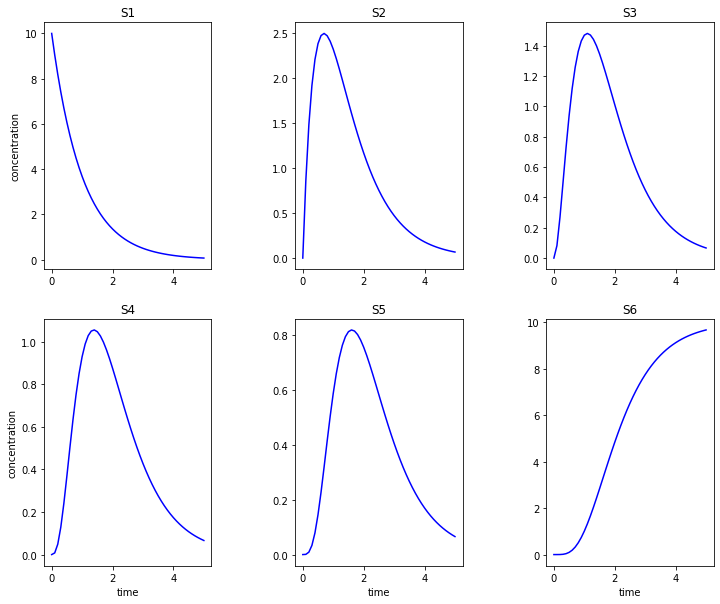

In [10]:
options = PlotOptions()
options.figsize = (12,10)
plotter = TimeseriesPlotter()
plotter.plotTimeSingle(common.ts, options=options, num_col=3, num_row=2)